# 从 0 开始的线性回归

In [1]:
%matplotlib inline
import d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

使用如下创建标号
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$
这里 $\mathbf{w} = [2, -3.4]^\top$ 和 $b = 4.2$。

In [2]:
def synthetic_data(w, b, num_examples):
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

查看创建的数据。

features: [2.2122064 0.7740038] 
label: 6.000587


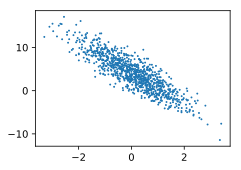

In [3]:
print('features:', features[0],'\nlabel:', labels[0])
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

读取一个小批量，也就是 `batch_size` 个随机采样到的样本。

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # read at random
    for i in range(0, num_examples, batch_size):
        j = min(i + batch_size, num_examples)
        batch_indices = np.array(indices[i:j])
        yield features[batch_indices], labels[batch_indices]

查看一个小批量。

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print('X =\n%s\ny =\n%s' % (X, y))
    break

X =
[[-1.2064103  -0.5134857 ]
 [-0.10867531 -1.1554946 ]
 [-0.8474277   0.91881126]
 [ 0.8370042  -1.1026353 ]
 [ 1.5543168  -1.0218834 ]
 [ 0.343837    0.02602482]
 [-1.2712238  -1.9902322 ]
 [ 0.3717077   0.9300072 ]
 [-0.6205473   0.7588377 ]
 [-0.8431705  -0.42457297]]
y =
[ 3.5305307   7.916799   -0.62370265  9.621203   10.769879    4.792636
  8.41412     1.7626055   0.3863677   3.9524884 ]


随机初始化模型权重并附上梯度。

In [6]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)

w.attach_grad()
b.attach_grad()

定义模型和损失函数。

In [7]:
def linreg(X, w, b):
    return np.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

定义优化算法。

In [8]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

训练。

In [9]:
lr, num_epochs = 0.03, 3  # 学习率和数据迭代周期。
net, loss = linreg, squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean()))
    
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)    

epoch 1, loss 0.040532
epoch 2, loss 0.000148
epoch 3, loss 0.000050
Error in estimating w [ 0.00038743 -0.0003047 ]
Error in estimating b [0.00041628]
